In [224]:
import requests
import pandas as pd
import time
from datetime import date
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
request = requests.get('https://api.mercadolibre.com/sites/MCO/categories')
cats = request.json()
cat_ids = [dct.get('id') for dct in cats]
cat_ids


['MCO1747',
 'MCO441917',
 'MCO1403',
 'MCO1071',
 'MCO1367',
 'MCO1368',
 'MCO1384',
 'MCO1246',
 'MCO40433',
 'MCO1039',
 'MCO1743',
 'MCO1051',
 'MCO1648',
 'MCO1144',
 'MCO172890',
 'MCO1276',
 'MCO5726',
 'MCO1000',
 'MCO175794',
 'MCO1574',
 'MCO1499',
 'MCO1459',
 'MCO1182',
 'MCO1132',
 'MCO3025',
 'MCO1168',
 'MCO118204',
 'MCO3937',
 'MCO1430',
 'MCO180800',
 'MCO1540',
 'MCO1953']

In [69]:
cats

[{'id': 'MCO1747', 'name': 'Accesorios para Vehículos'},
 {'id': 'MCO441917', 'name': 'Agro'},
 {'id': 'MCO1403', 'name': 'Alimentos y Bebidas'},
 {'id': 'MCO1071', 'name': 'Animales y Mascotas'},
 {'id': 'MCO1367', 'name': 'Antigüedades y Colecciones'},
 {'id': 'MCO1368', 'name': 'Arte, Papelería y Mercería'},
 {'id': 'MCO1384', 'name': 'Bebés'},
 {'id': 'MCO1246', 'name': 'Belleza y Cuidado Personal'},
 {'id': 'MCO40433', 'name': 'Boletas para Espectáculos'},
 {'id': 'MCO1039', 'name': 'Cámaras y Accesorios'},
 {'id': 'MCO1743', 'name': 'Carros, Motos y Otros'},
 {'id': 'MCO1051', 'name': 'Celulares y Teléfonos'},
 {'id': 'MCO1648', 'name': 'Computación'},
 {'id': 'MCO1144', 'name': 'Consolas y Videojuegos'},
 {'id': 'MCO172890', 'name': 'Construcción'},
 {'id': 'MCO1276', 'name': 'Deportes y Fitness'},
 {'id': 'MCO5726', 'name': 'Electrodomésticos'},
 {'id': 'MCO1000', 'name': 'Electrónica, Audio y Video'},
 {'id': 'MCO175794', 'name': 'Herramientas'},
 {'id': 'MCO1574', 'name': 'Ho

{'message': 'ERROR TIMEOUT FALLBACK, fallo el get a fallback',
 'error': {'cause': None,
  'error': {'cause': {'cause': None,
    'localizedMessage': 'Read timed out',
    'message': 'Read timed out',
    'stackTrace': [{'className': 'java.net.SocketInputStream',
      'fileName': 'SocketInputStream.java',
      'lineNumber': -2,
      'methodName': 'socketRead0',
      'nativeMethod': True},
     {'className': 'java.net.SocketInputStream',
      'fileName': 'SocketInputStream.java',
      'lineNumber': 116,
      'methodName': 'socketRead',
      'nativeMethod': False},
     {'className': 'java.net.SocketInputStream',
      'fileName': 'SocketInputStream.java',
      'lineNumber': 171,
      'methodName': 'read',
      'nativeMethod': False},
     {'className': 'java.net.SocketInputStream',
      'fileName': 'SocketInputStream.java',
      'lineNumber': 141,
      'methodName': 'read',
      'nativeMethod': False},
     {'className': 'org.apache.http.impl.io.AbstractSessionInputBuffer

In [117]:
items = []
sellers_set = set()
count = 0
for cat_id in cat_ids:
    count += 1
    if count % 14 == 0:
            time.sleep(0.5)
    for offset in list(range(0, 1000, 50)):
        url = f'https://api.mercadolibre.com/sites/MCO/search?category={cat_id}&offset={offset}'
        request = requests.get(url)
        items_cat = [dict(item, cat=f'{cat_id}') for item in request.json()['results']]
        items = items_cat + items
        for item in items:
            sellers_set.add(item['seller']['id'])
        

In [122]:
items = pd.DataFrame(items)[['id', 'cat', 'seller', 'price']]
items['seller'] = items['seller'].apply(pd.Series)
items

,id,cat,seller,price
0,MCO850491853,MCO1953,1055693607,723375.0
1,MCO621890389,MCO1953,230795866,78439.0
2,MCO564595407,MCO1953,372118717,95000.0
3,MCO453869976,MCO1953,117759656,44000.0
4,MCO604193367,MCO1953,106815582,42000.0
...,...,...,...,...
31484,MCO623787893,MCO1747,88409902,42000.0
31485,MCO455325548,MCO1747,193264204,19990.0
31486,MCO464935021,MCO1747,62840024,98900.0
31487,MCO884057162,MCO1747,62840024,82708.0


In [138]:
user_items = items.groupby(['seller', 'cat'], as_index = False).agg({'price' : 'mean', 'id' : 'nunique'})
user_items.rename(columns = {'seller':'id', 'price' : 'mean_price', 'id' : 'nr_items'}, inplace = True)
user_items


,id,cat,mean_price,nr_items
0,17434,MCO172890,7.517273e+04,11
1,86705,MCO1368,3.290000e+04,1
2,86705,MCO1574,2.340000e+04,2
3,86705,MCO1747,1.490000e+04,1
4,159107,MCO1168,2.499000e+04,1
...,...,...,...,...
10090,1214920364,MCO1743,2.600000e+08,1
10091,1214941011,MCO1743,5.200000e+07,1
10092,1214943608,MCO1743,6.600000e+07,1
10093,1214952781,MCO1743,1.100000e+08,1


In [158]:
user_items_pivot = pd.pivot_table(user_items, values=['mean_price', 'nr_items'], index='id',
                    columns=['cat'], aggfunc=np.mean, fill_value=0)
user_items_pivot

mean_price                                                  \
cat           MCO1000   MCO1039 MCO1051       MCO1071 MCO1132 MCO1144   
id                                                                      
17434             0.0       0.0     0.0      0.000000     0.0     0.0   
86705             0.0       0.0     0.0      0.000000     0.0     0.0   
159107            0.0       0.0     0.0      0.000000     0.0     0.0   
201072            0.0  109900.0     0.0      0.000000     0.0     0.0   
531347            0.0       0.0     0.0  15333.333333     0.0     0.0   
...               ...       ...     ...           ...     ...     ...   
1214920364        0.0       0.0     0.0      0.000000     0.0     0.0   
1214941011        0.0       0.0     0.0      0.000000     0.0     0.0   
1214943608        0.0       0.0     0.0      0.000000     0.0     0.0   
1214952781        0.0       0.0     0.0      0.000000     0.0     0.0   
1214953897        0.0       0.0     0.0      0.000000     0.0     0.0   

                                               ... nr_items                    \
cat         MCO1168 MCO1182 MCO118204 MCO1246  ...  MCO1743 MCO1747 MCO175794   
id                                             ...                              
17434           0.0     0.0       0.0     0.0  ...        0       0         0   
86705           0.0     0.0       0.0     0.0  ...        0       1         0   
159107      24990.0     0.0       0.0     0.0  ...        0       0         0   
201072          0.0     0.0       0.0     0.0  ...        0       0         0   
531347          0.0     0.0       0.0     0.0  ...        0       0         0   
...             ...     ...       ...     ...  ...      ...     ...       ...   
1214920364      0.0     0.0       0.0     0.0  ...        1       0         0   
1214941011      0.0     0.0       0.0     0.0  ...        1       0         0   
1214943608      0.0     0.0       0.0     0.0  ...        1       0         0   
1214952781      0.0     0.0       0.0     0.0  ...        1       0         0   
1214953897      0.0     0.0       0.0     0.0  ...        1       0         0   

                                                                         
cat        MCO180800 MCO1953 MCO3025 MCO3937 MCO40433 MCO441917 MCO5726  
id                                                                       
17434              0       0       0       0        0         0       0  
86705              0       0       0       0        0         0       0  
159107             0       0       0       0        0         0       0  
201072             0       0       0       0        0         0       0  
531347             0       0       0       0        0         0       0  
...              ...     ...     ...     ...      ...       ...     ...  
1214920364         0       0       0       0        0         0       0  
1214941011         0       0       0       0        0         0       0  
1214943608         0       0       0       0        0         0       0  
1214952781         0       0       0       0        0         0       0  
1214953897         0       0       0       0        0         0       0  

[6219 rows x 64 columns]

In [159]:
user_items_pivot.columns =[x1 + str(x2) for (x1,x2) in user_items_pivot.columns.tolist()]

In [160]:
user_items_pivot.reset_index(inplace=True)
user_items_pivot

,id,mean_priceMCO1000,mean_priceMCO1039,mean_priceMCO1051,mean_priceMCO1071,mean_priceMCO1132,mean_priceMCO1144,mean_priceMCO1168,mean_priceMCO1182,mean_priceMCO118204,...,nr_itemsMCO1743,nr_itemsMCO1747,nr_itemsMCO175794,nr_itemsMCO180800,nr_itemsMCO1953,nr_itemsMCO3025,nr_itemsMCO3937,nr_itemsMCO40433,nr_itemsMCO441917,nr_itemsMCO5726
0,17434,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,86705,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
2,159107,0.0,0.0,0.0,0.000000,0.0,0.0,24990.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,201072,0.0,109900.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,531347,0.0,0.0,0.0,15333.333333,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6214,1214920364,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
6215,1214941011,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
6216,1214943608,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
6217,1214952781,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0


In [133]:
user_items.to_csv('user_items_meli.csv')

In [172]:
user_items_pivot.describe()

,id,mean_priceMCO1000,mean_priceMCO1039,mean_priceMCO1051,mean_priceMCO1071,mean_priceMCO1132,mean_priceMCO1144,mean_priceMCO1168,mean_priceMCO1182,mean_priceMCO118204,...,nr_itemsMCO1743,nr_itemsMCO1747,nr_itemsMCO175794,nr_itemsMCO180800,nr_itemsMCO1953,nr_itemsMCO3025,nr_itemsMCO3937,nr_itemsMCO40433,nr_itemsMCO441917,nr_itemsMCO5726
count,6.219000e+03,6.219000e+03,6.219000e+03,6.219000e+03,6.219000e+03,6.219000e+03,6.219000e+03,6.219000e+03,6.219000e+03,6219.000000,...,6219.000000,6219.000000,6219.000000,6219.000000,6219.000000,6219.000000,6219.000000,6219.000000,6219.000000,6219.000000
mean,4.517379e+08,2.625641e+04,3.981107e+04,2.373411e+04,1.498031e+04,6.386391e+03,2.460389e+04,3.511154e+03,1.748699e+04,2360.696569,...,0.160798,0.154526,0.155170,0.160798,0.160476,0.160315,0.160798,0.096961,0.160637,0.160637
std,3.794623e+08,2.073260e+05,4.504724e+05,2.179658e+05,6.637424e+05,6.678509e+04,2.302361e+05,3.743018e+04,1.492594e+05,16764.166475,...,2.178479,1.388883,1.707139,1.064743,1.393700,3.343457,1.305357,0.836654,1.180040,1.723232
min,1.743400e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.514976e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.155040e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.565378e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.214954e+09,6.831668e+06,2.210000e+07,5.652438e+06,4.900000e+07,3.059900e+06,5.865888e+06,1.599900e+06,3.590000e+06,500900.000000,...,130.000000,50.000000,55.000000,28.000000,49.000000,179.000000,40.000000,46.000000,33.000000,55.000000


In [77]:
cat_id = 'MCO1430'
offset = 5
url = f'https://api.mercadolibre.com/sites/MCO/search?category={cat_id}&offset={offset}'
request = requests.get(url)
##pd.DataFrame(request.json().get('results'))
items = request.json()['results']
request.json()
#sellers = [item['seller']['id'] for item in items]
#sellers

{'site_id': 'MCO',
 'country_default_time_zone': 'GMT-05:00',
 'paging': {'total': 3456338,
  'primary_results': 1000,
  'offset': 5,
  'limit': 50},
 'results': [{'id': 'MCO869692087',
   'site_id': 'MCO',
   'title': 'Converse All Star En Zapato Para Hombre Y Mujer',
   'seller': {'id': 234138296,
    'permalink': None,
    'registration_date': None,
    'car_dealer': False,
    'real_estate_agency': False,
    'tags': None},
   'price': 90000,
   'prices': {'id': 'MCO869692087',
    'prices': [{'id': '2',
      'type': 'standard',
      'amount': 90000,
      'regular_amount': None,
      'currency_id': 'COP',
      'last_updated': '2022-05-04T19:21:42Z',
      'conditions': {'context_restrictions': [],
       'start_time': None,
       'end_time': None,
       'eligible': True},
      'exchange_rate_context': 'DEFAULT',
      'metadata': {}}],
    'presentation': {'display_currency': 'COP'},
    'payment_method_prices': [],
    'reference_prices': [{'id': '3',
      'type': 'min_st

In [68]:
pd.DataFrame(items)['id'].value_counts()

MCO460943079    3
MCO863789017    3
MCO656115082    3
MCO618867936    3
MCO619417835    3
               ..
MCO581565963    1
MCO654812282    1
MCO850191630    1
MCO960364780    1
MCO979239630    1
Name: id, Length: 29259, dtype: int64

In [65]:
items = pd.DataFrame(items)['seller', 'price']

In [66]:
items['seller'].apply(pd.Series)

,id,permalink,registration_date,car_dealer,real_estate_agency,tags,seller_reputation,home_image_url,eshop
0,134346335,None,None,False,False,None,None,None,None
1,780854836,None,None,False,False,None,None,None,None
2,272829963,None,None,False,False,None,None,None,None
3,117759656,None,None,False,False,None,None,None,None
4,339404762,None,None,False,False,None,None,None,None
...,...,...,...,...,...,...,...,...,...
31568,88409902,None,None,False,False,None,None,None,None
31569,193264204,None,None,False,False,None,None,None,None
31570,62840024,None,None,False,False,None,None,None,None
31571,353899337,None,None,False,False,None,None,None,None


items['seller'].apply(pd.Series)

In [14]:

user_id = 171048984
url = f'https://api.mercadolibre.com/users/{user_id}'
request = requests.get(url)
request.json()

{'id': 171048984,
 'nickname': 'IROBOTIC',
 'registration_date': '2014-11-16T15:58:39.000-04:00',
 'country_id': 'CO',
 'address': {'city': 'Kennedy', 'state': 'CO-DC'},
 'user_type': 'normal',
 'tags': ['normal', 'mshops'],
 'logo': None,
 'points': 73,
 'site_id': 'MCO',
 'permalink': 'http://perfil.mercadolibre.com.co/IROBOTIC',
 'seller_reputation': {'level_id': '5_green',
  'power_seller_status': None,
  'transactions': {'canceled': 5,
   'completed': 110,
   'period': 'historic',
   'ratings': {'negative': 0.01, 'neutral': 0, 'positive': 0.99},
   'total': 115}},
 'buyer_reputation': {'tags': []},
 'status': {'site_status': 'active'}}

In [91]:
users_data = []
for user_id in sellers_set:
        count += 1
        if count % 1400 == 0:
            time.sleep(0.5)

        else:
            url = f'https://api.mercadolibre.com/users/{user_id}'
            request = requests.get(url)
            users_data.append(request.json())


In [106]:
users_df = pd.DataFrame(users_data)
users_df = users_df[['id', 'registration_date', 'country_id', 'user_type', 'points', 'seller_reputation', 'status']]
users_df

,id,registration_date,country_id,user_type,points,seller_reputation,status
0,182255617,2015-04-29T12:19:06.000-04:00,CO,normal,2,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'}
1,537264136,2020-03-18T01:19:17.000-04:00,CO,normal,1,"{'level_id': None, 'power_seller_status': None...",{'site_status': 'active'}
2,64651278,2011-07-23T12:14:25.000-04:00,CO,normal,522,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'}
3,135233552,2013-03-19T21:59:15.000-04:00,CO,normal,437,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'}
4,521928721,2020-02-03T00:43:11.000-04:00,CO,normal,42,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'}
...,...,...,...,...,...,...,...
6213,1087602654,2022-03-10T14:05:47.000-04:00,CO,normal,0,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'}
6214,135462891,2013-03-24T09:18:18.000-04:00,CO,normal,1510,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'}
6215,235929588,2016-11-27T03:14:40.000-04:00,CO,normal,0,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'}
6216,29294588,2010-06-09T11:23:03.000-04:00,CO,normal,129,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'}


In [107]:
users_rep = users_df['seller_reputation'].apply(pd.Series)
users_df = users_df.join(users_rep)
users_df

,id,registration_date,country_id,user_type,points,seller_reputation,status,level_id,power_seller_status,transactions,real_level,protection_end_date
0,182255617,2015-04-29T12:19:06.000-04:00,CO,normal,2,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'},5_green,None,"{'canceled': 1, 'completed': 71, 'period': 'hi...",NaN,NaN
1,537264136,2020-03-18T01:19:17.000-04:00,CO,normal,1,"{'level_id': None, 'power_seller_status': None...",{'site_status': 'active'},None,None,"{'canceled': 0, 'completed': 0, 'period': 'his...",NaN,NaN
2,64651278,2011-07-23T12:14:25.000-04:00,CO,normal,522,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'},5_green,silver,"{'canceled': 18, 'completed': 717, 'period': '...",NaN,NaN
3,135233552,2013-03-19T21:59:15.000-04:00,CO,normal,437,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'},5_green,platinum,"{'canceled': 168, 'completed': 3477, 'period':...",NaN,NaN
4,521928721,2020-02-03T00:43:11.000-04:00,CO,normal,42,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'},5_green,gold,"{'canceled': 32, 'completed': 1221, 'period': ...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6213,1087602654,2022-03-10T14:05:47.000-04:00,CO,normal,0,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'},5_green,None,"{'canceled': 4, 'completed': 27, 'period': 'hi...",NaN,NaN
6214,135462891,2013-03-24T09:18:18.000-04:00,CO,normal,1510,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'},5_green,gold,"{'canceled': 155, 'completed': 2425, 'period':...",NaN,NaN
6215,235929588,2016-11-27T03:14:40.000-04:00,CO,normal,0,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'},5_green,silver,"{'canceled': 7, 'completed': 78, 'period': 'hi...",NaN,NaN
6216,29294588,2010-06-09T11:23:03.000-04:00,CO,normal,129,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'},5_green,silver,"{'canceled': 42, 'completed': 988, 'period': '...",NaN,NaN


In [108]:
users_trans = users_df['transactions'].apply(pd.Series)
users_df = users_df.join(users_trans)

In [109]:
users_df

,id,registration_date,country_id,user_type,points,seller_reputation,status,level_id,power_seller_status,transactions,real_level,protection_end_date,canceled,completed,period,ratings,total
0,182255617,2015-04-29T12:19:06.000-04:00,CO,normal,2,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'},5_green,None,"{'canceled': 1, 'completed': 71, 'period': 'hi...",NaN,NaN,1,71,historic,"{'negative': 0, 'neutral': 1, 'positive': 0}",72
1,537264136,2020-03-18T01:19:17.000-04:00,CO,normal,1,"{'level_id': None, 'power_seller_status': None...",{'site_status': 'active'},None,None,"{'canceled': 0, 'completed': 0, 'period': 'his...",NaN,NaN,0,0,historic,"{'negative': 0, 'neutral': 0, 'positive': 0}",0
2,64651278,2011-07-23T12:14:25.000-04:00,CO,normal,522,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'},5_green,silver,"{'canceled': 18, 'completed': 717, 'period': '...",NaN,NaN,18,717,historic,"{'negative': 0.01, 'neutral': 0.01, 'positive'...",735
3,135233552,2013-03-19T21:59:15.000-04:00,CO,normal,437,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'},5_green,platinum,"{'canceled': 168, 'completed': 3477, 'period':...",NaN,NaN,168,3477,historic,"{'negative': 0.01, 'neutral': 0.04, 'positive'...",3645
4,521928721,2020-02-03T00:43:11.000-04:00,CO,normal,42,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'},5_green,gold,"{'canceled': 32, 'completed': 1221, 'period': ...",NaN,NaN,32,1221,historic,"{'negative': 0.13, 'neutral': 0.03, 'positive'...",1253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6213,1087602654,2022-03-10T14:05:47.000-04:00,CO,normal,0,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'},5_green,None,"{'canceled': 4, 'completed': 27, 'period': 'hi...",NaN,NaN,4,27,historic,"{'negative': 0, 'neutral': 1, 'positive': 0}",31
6214,135462891,2013-03-24T09:18:18.000-04:00,CO,normal,1510,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'},5_green,gold,"{'canceled': 155, 'completed': 2425, 'period':...",NaN,NaN,155,2425,historic,"{'negative': 0.08, 'neutral': 0.04, 'positive'...",2580
6215,235929588,2016-11-27T03:14:40.000-04:00,CO,normal,0,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'},5_green,silver,"{'canceled': 7, 'completed': 78, 'period': 'hi...",NaN,NaN,7,78,historic,"{'negative': 0.43, 'neutral': 0, 'positive': 0...",85
6216,29294588,2010-06-09T11:23:03.000-04:00,CO,normal,129,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'},5_green,silver,"{'canceled': 42, 'completed': 988, 'period': '...",NaN,NaN,42,988,historic,"{'negative': 0.02, 'neutral': 0, 'positive': 0...",1030


In [110]:
users_rate = users_df['ratings'].apply(pd.Series)
users_df = users_df.join(users_rate)

In [111]:
users_df['status'] =  users_df['status'].apply(pd.Series)
users_df.drop(columns = ['seller_reputation', 'transactions', 'ratings'], inplace = True)
users_df

,id,registration_date,country_id,user_type,points,status,level_id,power_seller_status,real_level,protection_end_date,canceled,completed,period,total,negative,neutral,positive
0,182255617,2015-04-29T12:19:06.000-04:00,CO,normal,2,active,5_green,None,NaN,NaN,1,71,historic,72,0.00,1.00,0.00
1,537264136,2020-03-18T01:19:17.000-04:00,CO,normal,1,active,None,None,NaN,NaN,0,0,historic,0,0.00,0.00,0.00
2,64651278,2011-07-23T12:14:25.000-04:00,CO,normal,522,active,5_green,silver,NaN,NaN,18,717,historic,735,0.01,0.01,0.98
3,135233552,2013-03-19T21:59:15.000-04:00,CO,normal,437,active,5_green,platinum,NaN,NaN,168,3477,historic,3645,0.01,0.04,0.95
4,521928721,2020-02-03T00:43:11.000-04:00,CO,normal,42,active,5_green,gold,NaN,NaN,32,1221,historic,1253,0.13,0.03,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6213,1087602654,2022-03-10T14:05:47.000-04:00,CO,normal,0,active,5_green,None,NaN,NaN,4,27,historic,31,0.00,1.00,0.00
6214,135462891,2013-03-24T09:18:18.000-04:00,CO,normal,1510,active,5_green,gold,NaN,NaN,155,2425,historic,2580,0.08,0.04,0.88
6215,235929588,2016-11-27T03:14:40.000-04:00,CO,normal,0,active,5_green,silver,NaN,NaN,7,78,historic,85,0.43,0.00,0.57
6216,29294588,2010-06-09T11:23:03.000-04:00,CO,normal,129,active,5_green,silver,NaN,NaN,42,988,historic,1030,0.02,0.00,0.98


In [112]:
users_df['registration_date'] = users_df['registration_date'].str.split('T').str[0]
users_df.drop(columns = ['real_level', 'protection_end_date', 'country_id', 'period'], inplace = True)
users_df


,id,registration_date,user_type,points,status,level_id,power_seller_status,canceled,completed,total,negative,neutral,positive
0,182255617,2015-04-29,normal,2,active,5_green,None,1,71,72,0.00,1.00,0.00
1,537264136,2020-03-18,normal,1,active,None,None,0,0,0,0.00,0.00,0.00
2,64651278,2011-07-23,normal,522,active,5_green,silver,18,717,735,0.01,0.01,0.98
3,135233552,2013-03-19,normal,437,active,5_green,platinum,168,3477,3645,0.01,0.04,0.95
4,521928721,2020-02-03,normal,42,active,5_green,gold,32,1221,1253,0.13,0.03,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6213,1087602654,2022-03-10,normal,0,active,5_green,None,4,27,31,0.00,1.00,0.00
6214,135462891,2013-03-24,normal,1510,active,5_green,gold,155,2425,2580,0.08,0.04,0.88
6215,235929588,2016-11-27,normal,0,active,5_green,silver,7,78,85,0.43,0.00,0.57
6216,29294588,2010-06-09,normal,129,active,5_green,silver,42,988,1030,0.02,0.00,0.98


In [207]:
users_df.to_csv('users_data_meli.csv')

In [162]:
users_df['registration_date'] = users_df['registration_date'].apply(pd.to_datetime)

In [171]:
today = pd.to_datetime("now")
users_df['registration_years'] = (today - users_df['registration_date']).astype('timedelta64[Y]').astype('int')
users_df.drop(columns = ['registration_date'], inplace = True)
users_df

,id,user_type,points,status,level_id,power_seller_status,canceled,completed,total,negative,neutral,positive,registration_years
0,182255617,normal,2,active,5_green,None,1,71,72,0.00,1.00,0.00,7
1,537264136,normal,1,active,None,None,0,0,0,0.00,0.00,0.00,2
2,64651278,normal,522,active,5_green,silver,18,717,735,0.01,0.01,0.98,11
3,135233552,normal,437,active,5_green,platinum,168,3477,3645,0.01,0.04,0.95,9
4,521928721,normal,42,active,5_green,gold,32,1221,1253,0.13,0.03,0.84,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6213,1087602654,normal,0,active,5_green,None,4,27,31,0.00,1.00,0.00,0
6214,135462891,normal,1510,active,5_green,gold,155,2425,2580,0.08,0.04,0.88,9
6215,235929588,normal,0,active,5_green,silver,7,78,85,0.43,0.00,0.57,5
6216,29294588,normal,129,active,5_green,silver,42,988,1030,0.02,0.00,0.98,12


In [179]:
users_df.describe()

,id,points,canceled,completed,total,negative,neutral,positive,registration_years
count,6.218000e+03,6218.000000,6218.000000,6218.000000,6218.000000,6218.000000,6218.000000,6218.000000,6218.000000
mean,4.523927e+08,815.386459,77.980058,1734.471052,1812.451110,0.024878,0.045722,0.689452,5.301544
std,3.797677e+08,3223.541239,190.315690,3912.634545,4088.744611,0.064664,0.174772,0.426988,4.925235
min,1.743400e+04,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.517302e+08,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,3.159532e+08,75.000000,17.000000,383.500000,403.000000,0.000000,0.010000,0.940000,4.000000
75%,6.575429e+08,506.000000,76.000000,1789.250000,1873.500000,0.030000,0.020000,0.980000,8.000000
max,1.214902e+09,112815.000000,4335.000000,90510.000000,94845.000000,1.000000,1.000000,1.000000,22.000000


In [200]:
users_df[users_df['total'] >= 50000]

,id,user_type,points,status,level_id,power_seller_status,canceled,completed,total,negative,neutral,positive,registration_years
583,280824856,brand,11069,active,5_green,platinum,2272,54079,56351,0.05,0.03,0.92,4
3277,66208468,normal,12234,active,5_green,platinum,3881,59347,63228,0.07,0.03,0.90,11
3376,149996738,normal,8845,active,5_green,platinum,2544,55389,57933,0.07,0.04,0.89,8
4036,191222360,normal,62920,active,5_green,platinum,4335,90510,94845,0.03,0.02,0.95,7
5630,52392766,normal,112815,active,5_green,platinum,1977,55647,57624,0.02,0.01,0.97,11


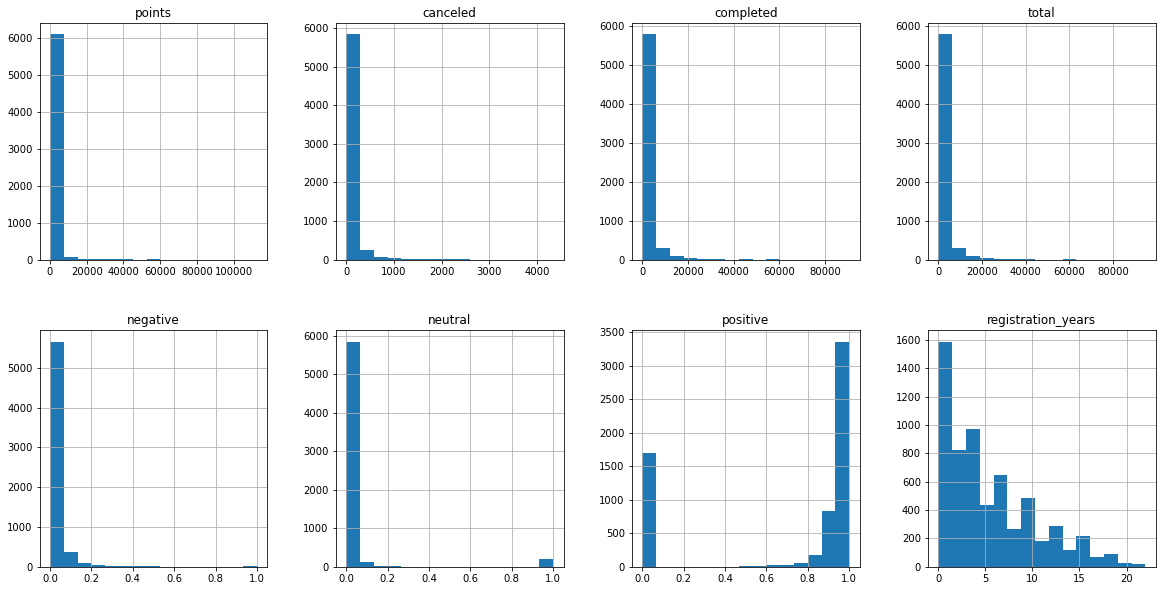

In [183]:
users_df[['points', 'canceled','completed','total', 'negative', 'neutral', 'positive', 'registration_years']].hist(bins=15, figsize=(20, 10), layout=(2, 4))

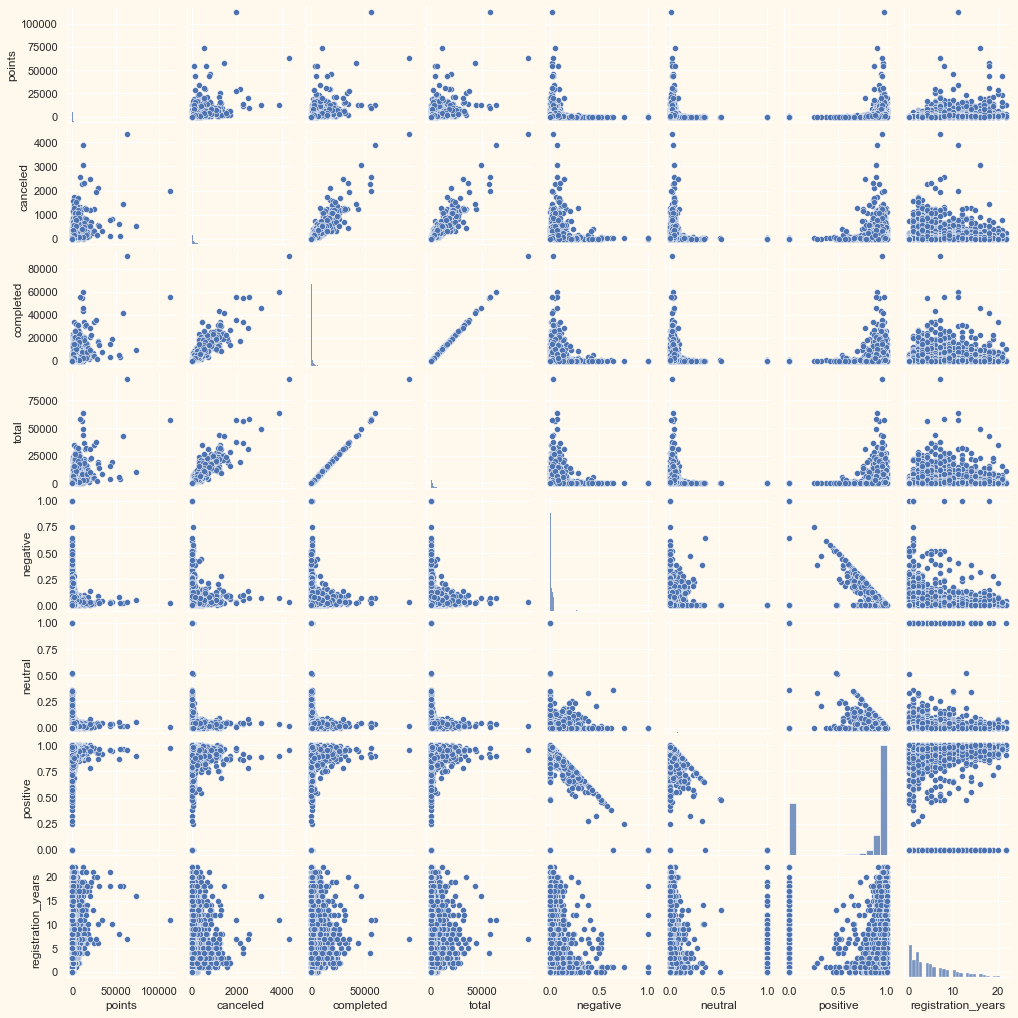

In [199]:
#To plot some selected features 
#Setting up colors prefrences
sns.pairplot(users_df[['points', 'canceled','completed','total', 'negative', 'neutral', 'positive', 'registration_years']], height=1.8)

In [210]:
users_df['power_seller_status'].value_counts(dropna = False)
###Los que estan como NaN no han logrado entrar en MercadoLider

NaN         3158
silver      1036
gold        1029
platinum     993
Name: power_seller_status, dtype: int64

In [217]:
users_df['power_seller_status'].fillna('without_level_ml', inplace = True)

In [221]:
users_df

,id,user_type,points,status,level_id,power_seller_status,canceled,completed,total,negative,neutral,positive,registration_years
0,182255617,normal,2,active,5_green,without_level_ml,1,71,72,0.00,1.00,0.00,7
1,537264136,normal,1,active,without_level_term,without_level_ml,0,0,0,0.00,0.00,0.00,2
2,64651278,normal,522,active,5_green,silver,18,717,735,0.01,0.01,0.98,11
3,135233552,normal,437,active,5_green,platinum,168,3477,3645,0.01,0.04,0.95,9
4,521928721,normal,42,active,5_green,gold,32,1221,1253,0.13,0.03,0.84,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6213,1087602654,normal,0,active,5_green,without_level_ml,4,27,31,0.00,1.00,0.00,0
6214,135462891,normal,1510,active,5_green,gold,155,2425,2580,0.08,0.04,0.88,9
6215,235929588,normal,0,active,5_green,silver,7,78,85,0.43,0.00,0.57,5
6216,29294588,normal,129,active,5_green,silver,42,988,1030,0.02,0.00,0.98,12


In [212]:
users_df[users_df['power_seller_status'].isna()].describe()

,id,points,canceled,completed,total,negative,neutral,positive,registration_years
count,3.158000e+03,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000
mean,5.547302e+08,151.536099,9.421153,153.361938,162.783091,0.016482,0.066510,0.444873,4.650095
std,4.443586e+08,1223.846258,42.107792,594.439636,633.068016,0.069900,0.234177,0.479010,4.958886
min,1.591070e+05,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.638896e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.044958e+08,3.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000
75%,1.112996e+09,40.750000,5.000000,107.000000,112.000000,0.000000,0.000000,0.980000,8.000000
max,1.214902e+09,54018.000000,1160.000000,13003.000000,14163.000000,1.000000,1.000000,1.000000,22.000000


In [213]:
users_df['level_id'].value_counts(dropna = False)

5_green          4169
NaN              1777
4_light_green     181
3_yellow           50
1_red              24
2_orange           15
Name: level_id, dtype: int64

In [220]:
users_df['level_id'].fillna('without_level_term', inplace = True)

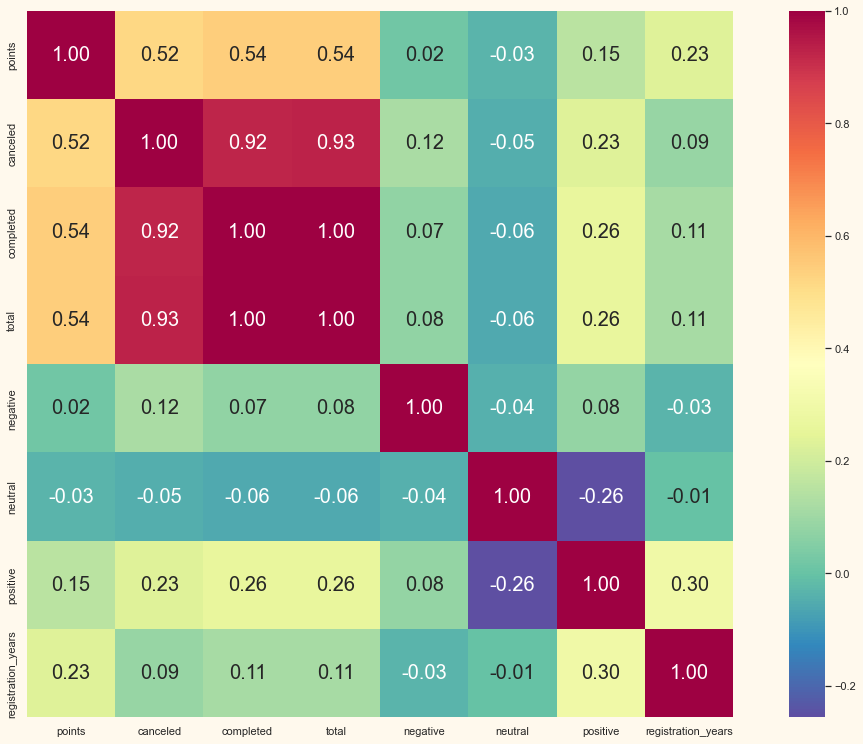

In [232]:
matcor = users_df[['points', 'canceled','completed','total', 'negative', 'neutral', 'positive', 'registration_years']].corr()
plt.figure(figsize=(20,13))
hm = sns.heatmap(matcor, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 20}, 
                 yticklabels=users_df[['points', 'canceled','completed','total', 'negative', 'neutral', 'positive', 'registration_years']].columns, 
                 xticklabels=users_df[['points', 'canceled','completed','total', 'negative', 'neutral', 'positive', 'registration_years']].columns, 
                 cmap="Spectral_r")
plt.show()

In [236]:
users_df.drop(columns = ['user_type', 'status'], inplace = True)

KeyError: "['user_type' 'status'] not found in axis"